<a href="https://colab.research.google.com/github/SRI-CSL/signal-public/blob/main/demo/02_activity_roles_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Introspection for Signaling Emergent Cyber-Social Operations (SIGNAL) 

## `Developer Activities and Roles in the Linux Kernel Mailing List (LKML)`

**In support of DARPA AIE Hybrid AI to Protect Integrity of Open-Source Code (SocialCyber)**

This project is under the GPL3 License. See the [LICENSE](https://www.gnu.org/licenses/gpl-3.0.en.html) file for the full license text.

**Copyright 2022 SRI International.**

# 🏃‍♀️ Quickstart

## 🪄 Install `needed` libraries

In [ ]:
# Install the SIGNAL API
!curl https://signal.cta.sri.com/client | tar xz
!pip install ./signal_api_client

In [ ]:
import signal_api.util as utils

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import warnings

## ✍ Set `needed` configuration

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
from IPython import get_ipython
utils.common.set_default_vars(os.environ, ipython_val=get_ipython())

In [ ]:
utils.dl.set_random_seed(2222)

## 🧹 Data cleaning and preparation

In [ ]:
data_file = "../data/lkml_developer_from0820_0121.csv"
if utils.common.is_run_in_colab():
  data_file = utils.gdrive.get_dataset('lkml_developer_from0820_0121', False)

df = pd.read_csv(data_file, sep='\t')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()


,sender_name,sender_email,sender_id,is_maintainer,nr_aliases,is_bot,email_id,sent_time,received_time,message_exper,...,is_patch_churn,is_patch_set,is_bug_fix,is_new_feature,is_accepted_patch,is_accepted_commit,in_reply_to,project_id,commit_exper,time_lapse
0,Greg Kroah-Hartman,gregkh@linuxfoundation.org,0,1,0,0,20200820053535,2020-08-20 09:35:35+00:00,2020-08-20 05:35:35-0500,0,...,1,1,1,1,0,0,2.020082e+13,-1,0,17.0
1,Greg Kroah-Hartman,gregkh@linuxfoundation.org,0,1,0,0,20200820053552,2020-08-20 09:35:52+00:00,2020-08-20 05:35:52-0500,1,...,1,1,1,1,0,0,2.020082e+13,-1,0,3.0
2,Greg Kroah-Hartman,gregkh@linuxfoundation.org,0,1,0,0,20200820053555,2020-08-20 09:35:55+00:00,2020-08-20 05:35:55-0500,2,...,1,1,1,1,0,0,2.020082e+13,-1,0,7.0
3,Greg Kroah-Hartman,gregkh@linuxfoundation.org,0,1,0,0,20200820053602,2020-08-20 09:36:02+00:00,2020-08-20 05:36:02-0500,3,...,1,1,1,1,0,0,2.020082e+13,-1,0,4.0
4,Greg Kroah-Hartman,gregkh@linuxfoundation.org,0,1,0,0,20200820053606,2020-08-20 09:36:06+00:00,2020-08-20 05:36:06-0500,4,...,1,1,1,1,0,0,2.020082e+13,-1,0,3.0


We draw our data from the data we produced in milestone 2, which describes developers participating in the LKML, their patch emails, and their socio-technical activity. However, we restricted our analysis to those patch emails meeting certain criteria: They must indicate either *accepted* or *rejected* patch emails, have been sent by valid submitters (i.e, developers whose identities can be confirmed in `patchwork`), have at least one reply, have written at least 50 words (or at least one sentence) in their email bodies, have a *known* persuasion strategy, and have been sent within a user specified time window (e.g., all emails sent to the LKML in 2020). This resulted dataframe (interest_df_norm) that holds a picture of the wealth of socio-technical activity occurring in the LKML.

In [ ]:
interest_df_norm, report = utils.data.process_and_clean_dataframe(df, quiet=True)

Output()

Output()

In [ ]:
interest_df_norm.head(1)

,sender_commitment,sender_experience,fkre_score,fkgl_score,is_persuasive,is_patch_email,is_first_patch_in_thread,sent_time,received_time,is_quickly_replied,is_patch_update,is_bug_fix,is_new_feature,is_accepted_patch,is_accepted_commit,verbosity
1,-0.472421,-0.227836,-0.013093,-0.007443,0.615009,0.004239,-0.305672,-2.052674,-2.179544,0.788616,0.737443,0.032799,0.450693,-0.282126,0.423065,0.022807


In [ ]:
report.metrics

,RecordCount,FeatureCount,NumericFeatures,BinaryFeatures
0,27411,16,7,9


<!-- # 1. Introduction (REMOVE)

In the following sections, we perform factor analysis to identify activities and roles. We then introduce `dev2vec`, our hybrid neural model for describing types of developers (roles) participating in the LKML, without human expert supervision. This model is trained on data generated by our factor analysis effort. -->



We also keep checkpoint of the **unprocessed and uncleaned** data


In [ ]:
# raw_data (aka, interest_df)
report.raw_data.head(1)

,sender_name,sender_email,sender_id,is_maintainer,nr_aliases,is_bot,email_id,sent_time,received_time,sender_commitment,...,is_bug_fix,is_new_feature,is_accepted_patch,is_accepted_commit,in_reply_to,project_id,sender_experience,time_lapse,is_quickly_replied,is_persuasive
1,Greg Kroah-Hartman,gregkh@linuxfoundation.org,0,1,0,0,20200820053552,1597916152,1597919752,1,...,1,1,0,0,2.020082e+13,-1,0,3.0,1,1


# 👇 Identifying typical developer activities 🤸 in the LKML data

## (Optional) Adequacy test to evaluate the factorability of the data.

Based on prior analysis, we know we can do factor analysis on our data. However, if you want to test this, this is how to check for "factorability".

The followng code evaluates the factorability of our data. In this context, factorability means we can find some factors in our data. For this, we can use two methods: **(1) the Bartlett's test, and (2) the Kaiser-Meyer-Olkin test.**     

In [ ]:
interest_df_norm, metrics_report = utils.ml.factor_analysis(interest_df_norm, metrics_only=True, quiet=True)

Output()

### 🧪 Bartlett's test and Kaiser-Meyer-Olkin test

The **Bartlett's test** of sphericity checks whether or not the observed variables (features of interest) intercorrelate at all. To do that, it uses the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

The **Kaiser-Meyer-Olkin (KMO)** test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [ ]:
metrics_report.metrics

,Chi_Square_Value,P_Value,Kaiser_Meyer_Olkin_Score
0,515371.85,0.0,0.77


We can observe that the *p-value is 0.0*. This means our test was statistically significant, and thus we can use factor analysis. Note that having statistically significant test means that the observed correlation matrix is not an identity matrix.

The overall KMO for our data is **0.66**, which is good. This value indicates that you can proceed with your planned factor analysis.

## 👀 Activity recognition using factor analysis

Factor Analysis is an exploratory data analysis method we used to search influential latent variables (factors) from the set of observed variables in the new dataset. In other words, we use it to check whether a number of variables (features of interest) are linearly related to a smaller number of unobservable factors. To search for these influencial factors, we use *factor extraction* (Principal Axis Factors) and *factor rotation* (Oblique) operations.

To perform factor analysis, we are going to use the `signal.factor_analysis` API. For *factor extraction*, we will start with 10 factors (just an arbitrary number; factor_analyzer can produce more factors) and no rotation.

Output()

Output()

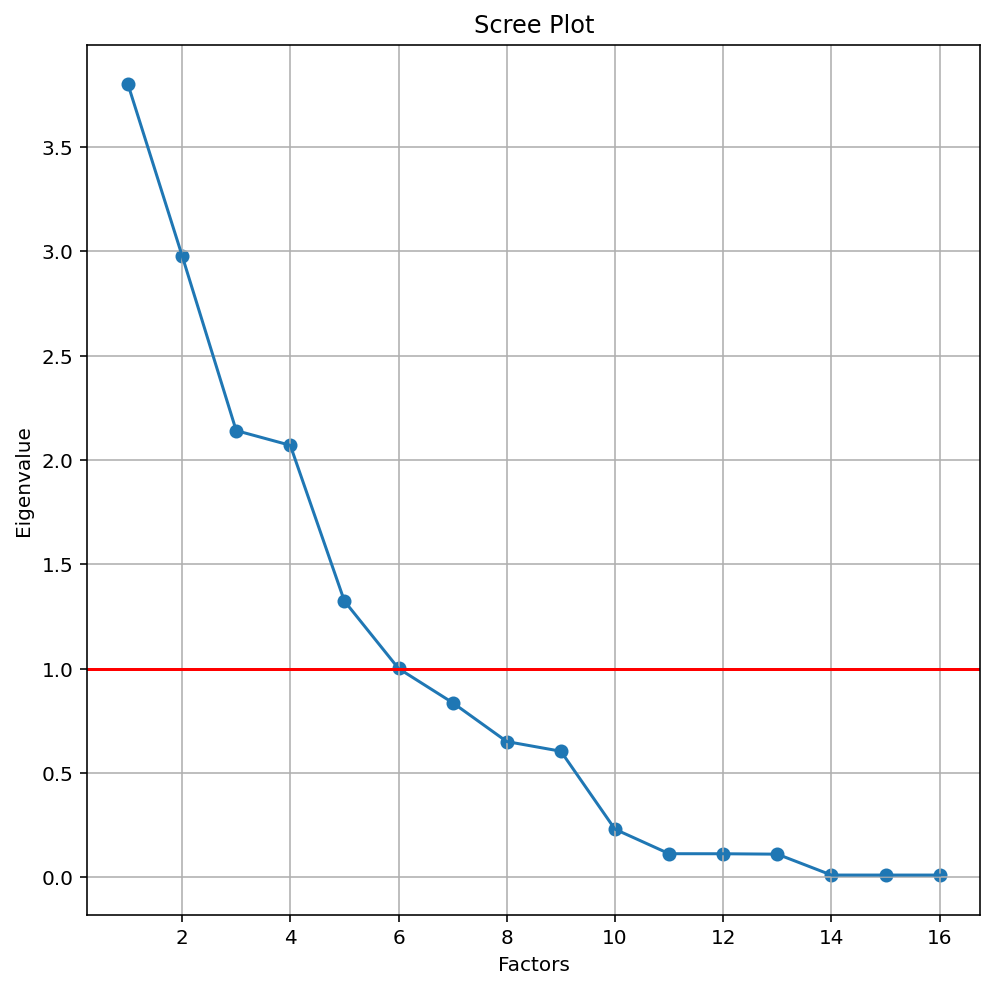

In [ ]:
eigenval_df, exploration_report = utils.ml.factor_analysis(
    interest_df_norm, 10, plot_summary=True)

The `signal.factor_analysis` API returns the result of factor analysis and a *report* of the operation. From the report, you can see the estimated eigenvalues, which represent the descriptive categories that describe our developer activity data.

In [ ]:
exploration_report.factors

,Eigenvalue
Factor 1,3.800934
Factor 2,2.979690
Factor 3,2.141027
Factor 4,2.070445
Factor 5,1.323535
Factor 6,1.000356
Factor 7,0.836347
Factor 8,0.650056
Factor 9,0.603586
Factor 10,0.229730


*5 factors* were identified. You can see this in the scree plot the API generated, a visual representation of these factors' eigenvalues.

To generate more accurate results when these factors correlate, we use *factor rotation* (i.e., oblique rotation). This will generate a correlation matrix plot, which users can evaluate to generate descriptive names for the estimated factors. Same as before this operation will produce a processed output (factor loadins) and a report (`factor_analysis_report`).

Output()

Output()

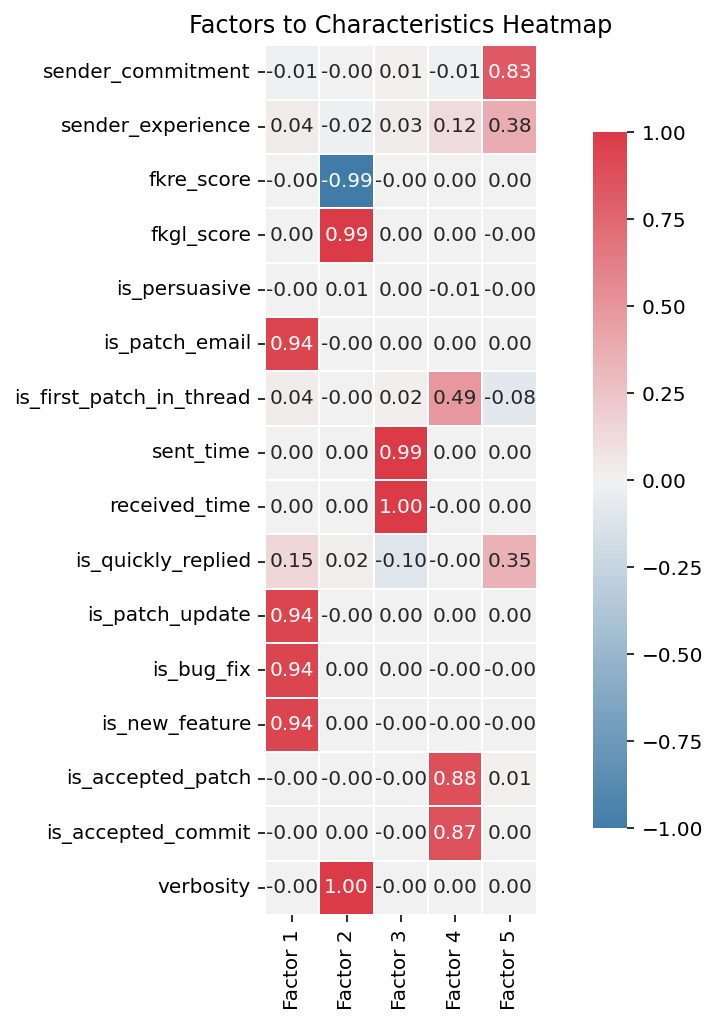

In [ ]:
loadings_df, factor_analysis_report = utils.ml.factor_analysis(
    interest_df_norm, 
    5, 
    plot_summary=True, 
    rotation="oblimin", 
    quiet=True)

In [ ]:
loadings_df.head(1)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
sender_commitment,-0.012064,-0.001421,0.008803,-0.011802,0.830643


In [ ]:
factor_analysis_report.metrics

,Chi_Square_Value,P_Value,Kaiser_Meyer_Olkin_Score,Number_of_Factors
0,515371.85,0.0,0.77,5


We describe developer behavior in the above plot according to **5 types of activities** developers typically perform in the LKML:

<!-- 
| Activity | Factor | Description |
|---:|---|---|
| Code Contribution | Factor 1 | Contributing code changes to the Linux Kernel (LK). |
| Knowledge Sharing | Factor 2 | Commenting on specific topics, e.g., Voicing technical opinions, <br>providing suggestions, and asking or answering questions. |
| Patch Posting | Factor 3 | Responding to a bug report or a feature request through patch emails. |
| Progress Control | Factor 4 | Accounting for received patches that have been accepted or committed. |
| Acknowledgment and Response | Factor 5 | Patch acknowledgement, feedback, and landing by core maintainers. | -->



In [ ]:
discovered_activities = {
    'Activity': ['Code Contribution', 
                 'Knowledge Sharing', 
                 'Patch Posting', 
                 'Progress Control', 
                 'Acknowledgment and Response'], 
    'Factor': ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'], 
    'Description': ['Contributing code changes to the Linux Kernel (LK).', 
                    'Commenting on specific topics, e.g., Voicing technical opinions, providing suggestions, and asking or answering questions.', 
                    'Responding to a bug report or a feature request through patch emails.', 
                    'Accounting for received patches that have been accepted or committed.', 
                    'Patch acknowledgement, feedback, and landing by core maintainers.']}
dev_activities_df = pd.DataFrame.from_dict(discovered_activities)
dev_activities_df.style.set_properties(**{'text-align': 'left'})

,Activity,Factor,Description
0,Code Contribution,Factor 1,Contributing code changes to the Linux Kernel (LK).
1,Knowledge Sharing,Factor 2,"Commenting on specific topics, e.g., Voicing technical opinions, providing suggestions, and asking or answering questions."
2,Patch Posting,Factor 3,Responding to a bug report or a feature request through patch emails.
3,Progress Control,Factor 4,Accounting for received patches that have been accepted or committed.
4,Acknowledgment and Response,Factor 5,"Patch acknowledgement, feedback, and landing by core maintainers."


In [ ]:
# Maps factors to activity names
activity_name = {'Factor 1': 'Code Contribution',
                 'Factor 2': 'Knowledge Sharing',
                 'Factor 3': 'Patch Posting', 
                 'Factor 4': 'Progress Control', 
                 'Factor 5': 'Acknowledgement and Response'}

utils.console.stdout.print("Factor to Activity Map")
for i, key in enumerate(activity_name):
  utils.console.stdout.print(f"{i+1}. {activity_name[key]}")

Factor to Activity Map

1. Code Contribution

2. Knowledge Sharing

3. Patch Posting

4. Progress Control

5. Acknowledgement and Response

# 👇 Identifying developer roles (⌐■_■) in the LKML

In this section we are going to use the set of developer activitities (i.e., our latent factors) identified in the above sections to identify developer roles. Specifically, we perform clustering analysis on the factor scores representing these activities in order to identify the distinct roles developers assumed in the LKML.

Preparing data for developer role discovery. This process generalizes the factors scores generated by the `factor_analysis` API for concrete developer activities to sequential developer data. This output is capture in the report object.

In [ ]:
# Recover the sent_time feature based on the value
# of sent_time_secs
df_datetime = report.raw_data.copy()
df_datetime['sent_time'] = pd.to_datetime(report.raw_data['sent_time'] * 10**9)
df_datetime['sent_time'].head()

1   2020-08-20 09:35:52
2   2020-08-20 09:35:55
3   2020-08-20 09:36:02
4   2020-08-20 09:36:06
5   2020-08-20 09:36:09
Name: sent_time, dtype: datetime64[ns]

In [ ]:
_, factors_scores_report = utils.ml.factor_analysis(
    interest_df_norm, 
    5, rotation="oblimin", 
    multi_index_df=df_datetime[['sender_id', 'sent_time']],
    quiet=True)

Output()

Output()

In [ ]:
df_factors = factors_scores_report.factor_scores

In [ ]:
# Using the above index, determine the number of unique senders (aka developers)
cnt = df_factors.groupby(['sender_id']).count().shape[0]
print("Number of unique developers:", cnt) 

Number of unique developers: 1832


In [ ]:
utils.data.rename_columns_in_dataframe(df_factors, activity_name, inplace=True)

In [ ]:
df_factors.head(1)

,,Code Contribution,Knowledge Sharing,Patch Posting,Progress Control,Acknowledgement and Response
sender_id,sent_time,,,,,
0,2020-08-20 09:35:52,0.859261,0.013534,0.012611,0.228412,0.258722


In the context of modeling developer behavior, one may wonder whether these activities correlate with each other. To answer this question, we compute the correlation coefficients among these activities. 

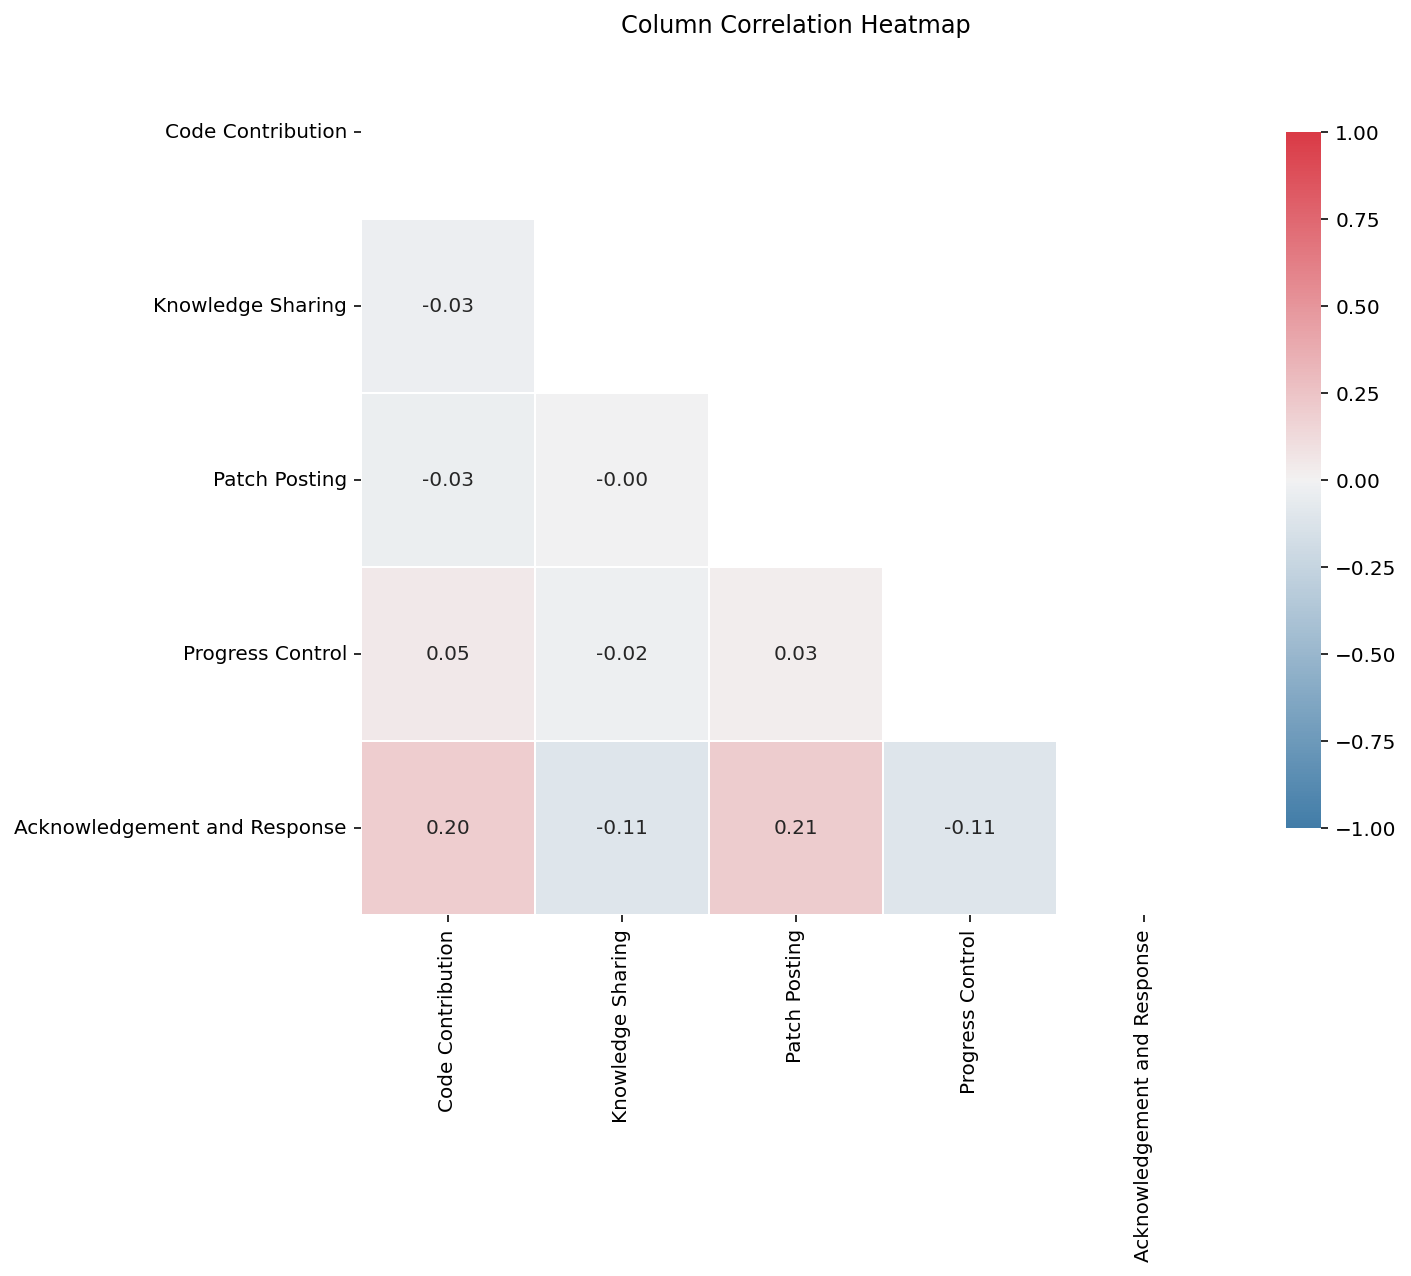

,Code Contribution,Knowledge Sharing,Patch Posting,Progress Control,Acknowledgement and Response
Code Contribution,1.000000,-0.027824,-0.032658,0.050153,0.197393
Knowledge Sharing,-0.027824,1.000000,-0.004718,-0.016672,-0.106740
Patch Posting,-0.032658,-0.004718,1.000000,0.025096,0.210357
Progress Control,0.050153,-0.016672,0.025096,1.000000,-0.108790
Acknowledgement and Response,0.197393,-0.106740,0.210357,-0.108790,1.000000


In [ ]:
utils.plots.plot_column_correlation_heatmap(df_factors)

The above information demonstrates some correlations between the extracted activity dimensions. *This support our hypothesis that the factors influencing the actions developers take when participating in the LKML are not independent.* Consequently, we can use this insight to identify roles in our LKML data.

### Finding developer roles

We'll find developer roles in the LKML using *agglomerative hierarchical clustering* on the scaled factor scores.

Output()

Output()

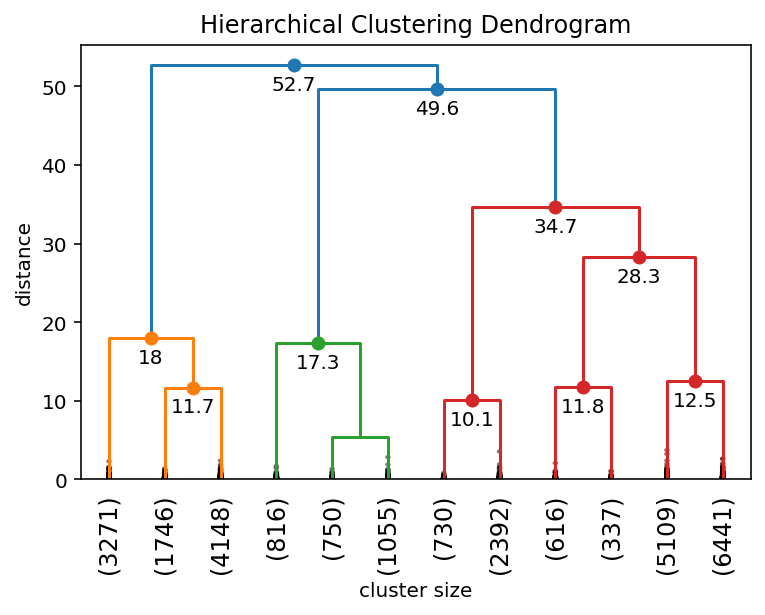

In [ ]:
_, roles_report = utils.ml.roles_discovery(
    df_factors, plot_summary=True, truncate_mode='lastp', p=12, leaf_rotation=90., 
    leaf_font_size=12., show_contracted=True, annotate_above=10, quiet=True)


In [ ]:
roles_report.metrics

,Cophenetic_Correlation,Cophenetic_Distance
0,0.73,36.12


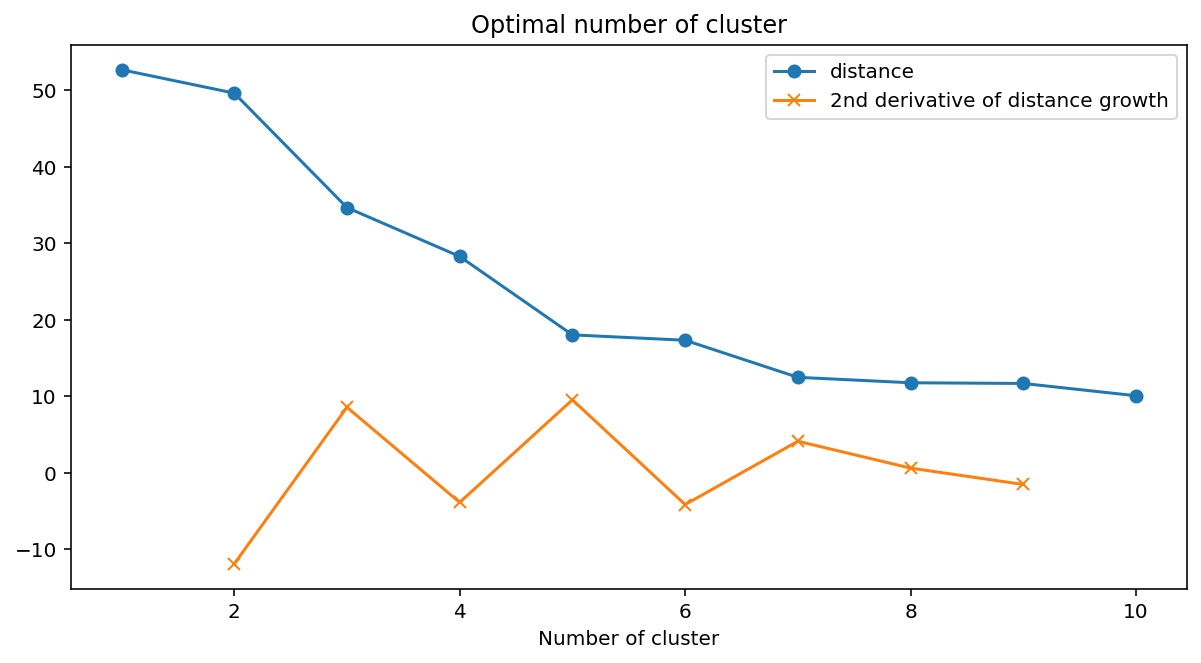

Number of clusters: 5

In [ ]:
roles_report.plot_parameters()

The gain in explained variance reduces significantly from 3 to 5 to 6 (‘elbow’ is at k = 3). So, optimal number of clusters seems to be 3.
Alternatively, we can just focus on finding where the acceleration of distance growth is the biggest:



According to the above plot, the optimal k for our dataset is **5 clusters**. *Consequently, we set a cut-off distance of 25 (max_d).*

Output()

Output()

Output()

Output()

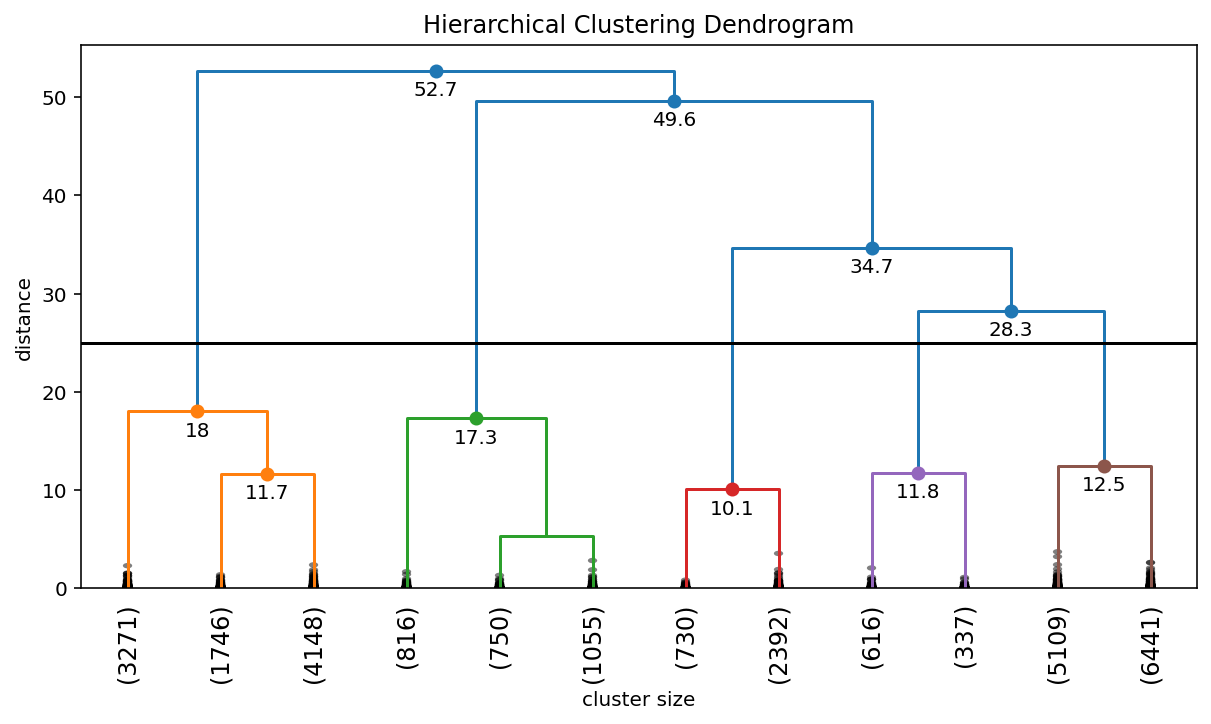

In [ ]:
roles_df, acc_roles_report = utils.ml.roles_discovery(
    df_factors, data = roles_report.data, flat_option=True, truncate_mode='lastp', p=12, leaf_rotation=90., 
    leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=25, quiet=True)

In [ ]:
# discovered clusters
roles_df

,0,1,2,3,4
Code Contribution,0.858249,0.146726,0.859474,0.858586,0.856721
Knowledge Sharing,0.013251,0.015215,0.008842,0.011110,0.014300
Patch Posting,0.283752,0.617086,0.755450,0.618142,0.782252
Progress Control,0.201027,0.205174,0.196313,0.856899,0.203729
Acknowledgement and Response,0.303511,0.233481,0.763511,0.253514,0.278581


### Radar plot showing the activity space characteristics of roles in the LKML

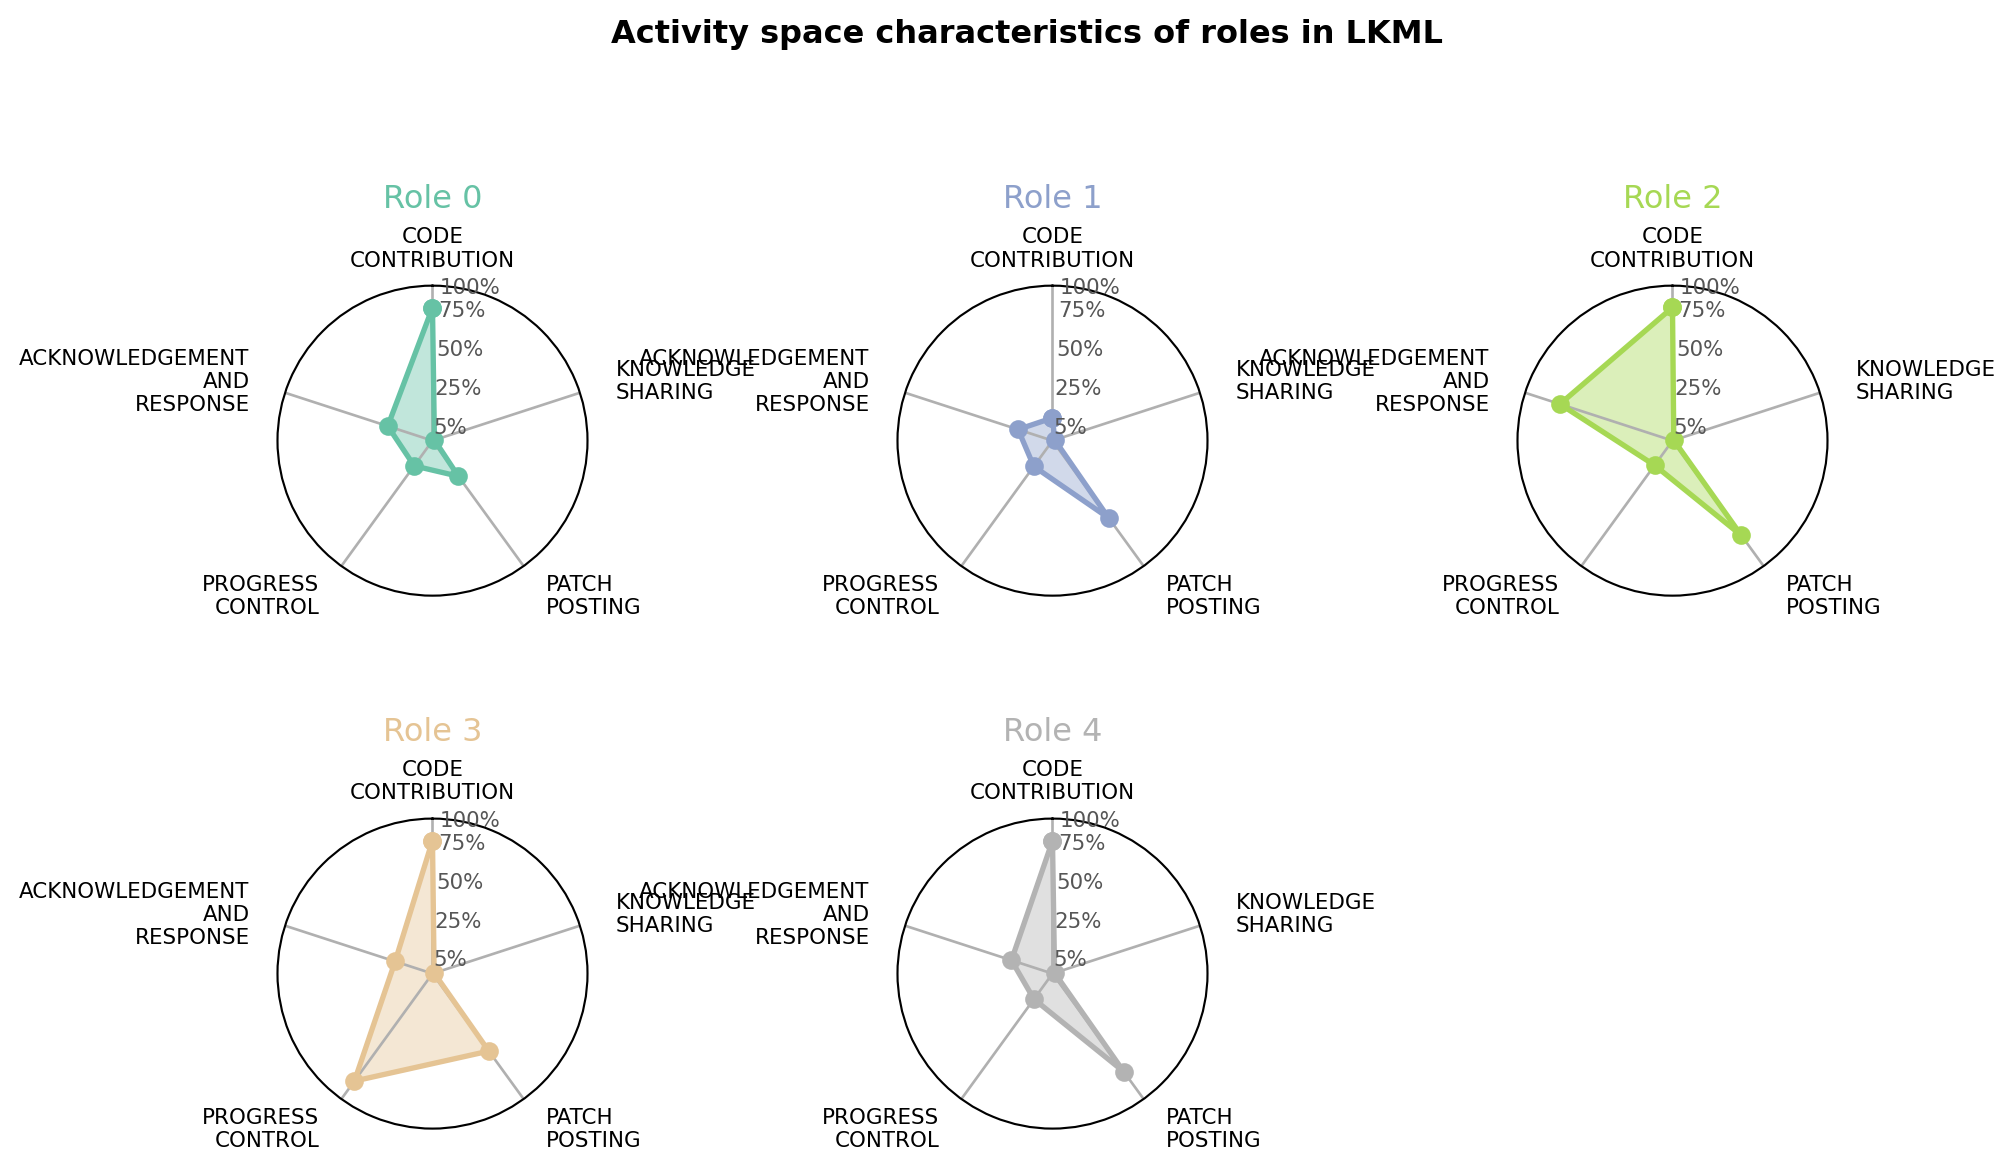

In [ ]:
acc_roles_report.plot_components()

Interpretation of Activity space of characteristics for roles

- **Role 0.**  Role 0 describes a type of developer that typically works in isolation; one that occasionally contributes to the kernel and when they do they contribute major changes. We name this role **Occasional developer**.
- **Role 1.** Role 1 describes a type of developer that rarely contributes to the Linux Kernel contributor. This type of developer barely participates in the LKML but when they do they submit a flurry of patch emails that tend to be ignored or rejected by maintainers. This type of developer avoids engaging in sharing knowledge activities and seems unaware of the Kernel's patch process. We name this role **Opportunistic programmer**, or **Rare contributor**.
- **Role 2.** Role 2 describes a type of developer that consistently focuses on making small code contributions to the Kernel's code or fixes bugs. We name this role **Engaged core developer**.
- **Role 3.** Role 3 describes a type of developer who is an active contributor and frequently engages in the progress control activity concerning posted patches. We name this role **Core maintainer**.
- **Role 4.** Role 4 describes a type of developer that works in isolation, and and tends to provoke or incite an action or change in project direction. We name this role **Instigator**.


# 🌡 Measuring Role dynamics 🤹 in the LKML

Preparing the factors data frame for role dynamics analysis. This task is based on the RCI score computation described in [Cheng et al. 2019](https://arxiv.org/abs/1903.05277).

In [ ]:
df_factors.head()

Code Contribution  Knowledge Sharing  \
sender_id sent_time                                                   
0         2020-08-20 09:35:52           0.859261           0.013534   
          2020-08-20 09:35:55           0.897292           0.009481   
          2020-08-20 09:36:02           0.858517           0.009132   
          2020-08-20 09:36:06           0.842542           0.008300   
          2020-08-20 09:36:09           0.850966           0.010151   

                               Patch Posting  Progress Control  \
sender_id sent_time                                              
0         2020-08-20 09:35:52       0.012611          0.228412   
          2020-08-20 09:35:55       0.090553          0.190483   
          2020-08-20 09:36:02       0.070129          0.305459   
          2020-08-20 09:36:06       0.068469          0.217217   
          2020-08-20 09:36:09       0.090245          0.279914   

                               Acknowledgement and Response  
sender_id sent_time                                          
0         2020-08-20 09:35:52                      0.258722  
          2020-08-20 09:35:55                      0.241613  
          2020-08-20 09:36:02                      0.245373  
          2020-08-20 09:36:06                      0.241429  
          2020-08-20 09:36:09                      0.251299

In [ ]:
utils.ml.compute_role_change_intensity(df_factors, acc_roles_report, quiet=True)

Output()

Output()

3.54

**Conclusion on the aggregated RCI**

When taking into consideration all developers participating in the LKML for the specified date period, a **3.55..** RCI score indicates that overall there is a high-level role change intensity in that period. This supports the hypothesis that there are multiple roles assumed when developers engage in the the LKML.

Now, let's do this for each developer in that time period


Output()

Output()

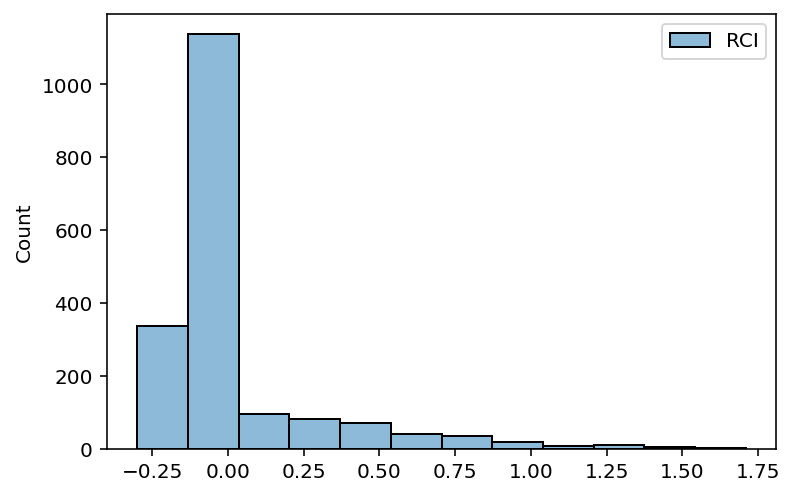

In [ ]:
RCI_df = utils.ml.compute_role_change_intensity(
    df_factors, 
    acc_roles_report, 
    single_rci=False, 
    quiet=True)

In [ ]:
RCI_df.describe()

,RCI
count,1832.000000
mean,0.039219
std,0.272875
min,-0.300000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.710000


**Conclusion**

In the above period, developers participating in the LKML have asssumed a fixed role. Developers with a zero RCI are rare contributors. And the ones with a positive RCI tend to be maintainers.


## &#128071; What's next?

&#128072; [Installation and Dashboard Visualization](https://colab.research.google.com/github/SRI-CSL/signal-public/blob/main/demo/01_installation_and_dashboard.ipynb)

&#128073; [Activity Evolution Trajectory](https://colab.research.google.com/github/SRI-CSL/signal-public/blob/main/demo/03_activity_evolution_trajectory_aw2v.ipynb)